In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock_csv_path = "../../Analysis/Stock_data.csv"

stock_df = pd.read_csv(stock_csv_path)
stock_df
daily_change = abs(stock_df["Close"]-stock_df["Open"])
stock_df["Daily Change"] = daily_change
stock_df[['Month','Day','Year']] = stock_df['Date'].str.split('/',expand=True)
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Change,Month,Day,Year
0,1/2/1992,3152.100098,3172.629883,3139.310059,3172.399902,3172.399902,235500,20.299804,1,2,1992
1,1/3/1992,3172.399902,3210.639893,3165.919922,3201.500000,3201.500000,236200,29.100098,1,3,1992
2,1/6/1992,3201.500000,3213.330078,3191.860107,3200.100098,3200.100098,272800,1.399902,1,6,1992
3,1/7/1992,3200.100098,3210.199951,3184.479980,3204.800049,3204.800049,255100,4.699951,1,7,1992
4,1/8/1992,3204.800049,3229.199951,3185.820068,3203.899902,3203.899902,290400,0.900147,1,8,1992
...,...,...,...,...,...,...,...,...,...,...,...
7322,1/27/2021,30893.779300,30893.779300,30206.910160,30303.169920,30303.169920,5664700,590.609380,1,27,2021
7323,1/28/2021,30377.189450,30951.410160,30377.189450,30603.359380,30603.359380,4651400,226.169930,1,28,2021
7324,1/29/2021,30553.910160,30553.910160,29856.300780,29982.619140,29982.619140,5363200,571.291020,1,29,2021
7325,2/1/2021,30054.730470,30335.910160,30014.970700,30211.910160,30211.910160,3470600,157.179690,2,1,2021


In [3]:
group_stock = stock_df.groupby(["Year"])

year_open = group_stock["Open"].first()
year_close = group_stock["Close"].last()
year_change = year_close-year_open
perc_change = ((year_close/year_open) - 1)*100
avg_close = group_stock["Close"].mean()
avg_change = group_stock["Daily Change"].mean()

In [12]:
dowjones_df = pd.DataFrame({
    "First Open": year_open,
    "Last Close": year_close,
    "Average Close": avg_close,
    "Year Change": year_change,
    "Percent Change": perc_change,
    "Avg Daily Change/Volatility": avg_change
    
})
dowjones_df["Percent Change"] = dowjones_df["Percent Change"].map("{:.2f}".format)
dowjones_df["First Open"] = dowjones_df["First Open"].map("{:.2f}".format)
dowjones_df["Last Close"] = dowjones_df["Last Close"].map("{:.2f}".format)
dowjones_df["Average Close"] = dowjones_df["Average Close"]#.map("{:.2f}".format)
dowjones_df["Year Change"] = dowjones_df["Year Change"].map("{:.2f}".format)
dowjones_df["Avg Daily Change/Volatility"] = dowjones_df["Avg Daily Change/Volatility"].map("{:.3f}".format)
#dowjones_df.reset_index(level=0, inplace=True)
dowjones_df

,First Open,Last Close,Average Close,Year Change,Percent Change,Avg Daily Change/Volatility
Year,,,,,,
1992,3152.10,3301.11,3284.080357,149.01,4.73,16.446
1993,3301.10,3754.09,3524.918453,452.99,13.72,14.381
1994,3754.10,3834.44,3794.222298,80.34,2.14,19.540
1995,3834.40,5117.12,4494.276383,1282.72,33.45,18.978
1996,5115.70,6448.27,5739.626469,1332.57,26.05,32.871
1997,6447.50,7908.30,7447.007625,1460.80,22.66,63.827
1998,7910.20,9181.43,8630.764420,1271.23,16.07,76.314
1999,9184.01,11497.12,10481.555222,2313.11,25.19,82.119
2000,11501.85,10787.99,10729.377651,-713.86,-6.21,105.980


In [14]:
dowjones_df.to_csv("DowJones_Clean")

* Create a bar chart "Avg Daily Change/Volatility' and  'Percent Change' vs Years"

In [16]:
x = dowjones_df[["Average Close"]].plot

In [17]:
plt.show()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

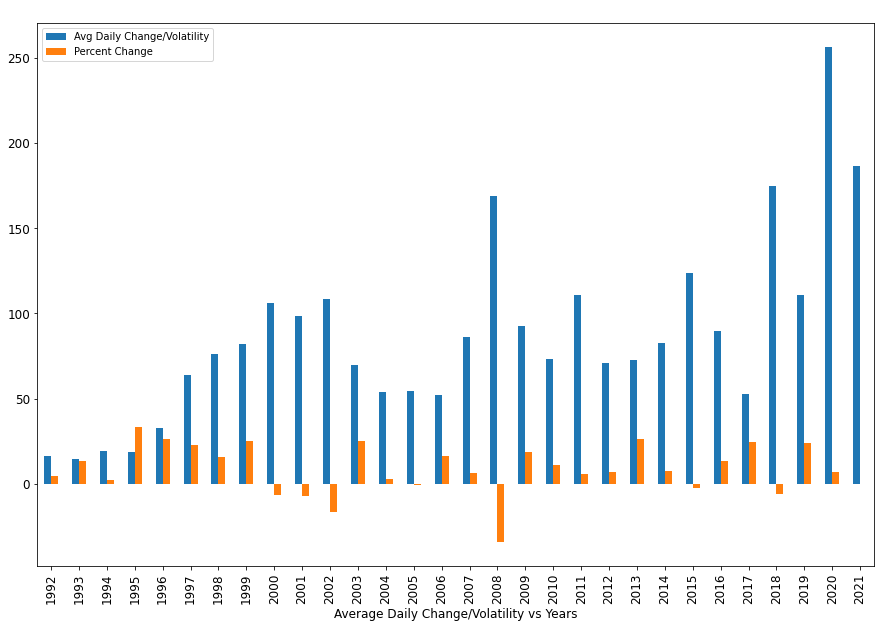

In [15]:
ax = dowjones_df[['Avg Daily Change/Volatility', 'Percent Change']].astype(float).plot(kind='bar', title =" ", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Average Daily Change/Volatility vs Years", fontsize=12)
ax.set_ylabel("", fontsize=12)
plt.show()